#1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To unzip the zipped file.
import zipfile
# To check if the file in path already exists or not
import os
# To split the train set to train and test set
from sklearn.model_selection import train_test_split
# For text based pre-processing
import nltk
# For punctuation removal
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
# TO execute Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import math

# To use Inbuilt- TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Pickle Files - 
import pickle

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Unzip and Load the Dataset

NOTE -  Here we load the Dataset in the folder Data-Q2 and check if the folder already exists. If the folder already exists, the files are not unzipped again.

In [3]:
print(os.getcwd())

/content


In [4]:
par_dir = '/content/drive/MyDrive/IR/Assignment'

In [5]:
# Add the name of the Directory
my_dir = 'Data-Q2'
# Parent Directory path
par_dir = '/content/drive/MyDrive/IR/Assignment'
    
# Path to the new directory
path = os.path.join(par_dir,my_dir)

In [6]:
print(os.path.isdir(path))

True


In [7]:
if (os.path.isdir(path)==False):

  # Make the new directory
  os.mkdir(path)
  print("Directory '% s' created" % my_dir)

  # Unzip the Zipped FIle
  zip = path + '/BBC-News.zip'
  with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(path)

Load the Train and Test Data from the Dataset loaded in the Target Directory

In [8]:
train_path = path + '/BBC News Train.csv'
test_path = path + '/BBC News Test.csv'

In [9]:
train_df =  pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [10]:
print(train_df.head())
print(test_df.head())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...


In [11]:
# Get the column header of the Dataframes
my_lst = list(train_df.columns)
print(my_lst)

['ArticleId', 'Text', 'Category']


In [12]:
# Get all unique categories.
my_lst = list(train_df['Category'].unique())
all_class = len(my_lst)
print(my_lst)
print(all_class)

['business', 'tech', 'politics', 'sport', 'entertainment']
5


Observation -  The train set consists of three columns namely S.NO , ArticleID, the TEXT and the Category.

In [13]:
# Check for duplicates and remove if any.
dup = train_df[train_df.duplicated()]
print(dup)

Empty DataFrame
Columns: [ArticleId, Text, Category]
Index: []


In [14]:
# Remove all dupluacte rows
train_df = train_df.drop_duplicates(keep=False)

#3. Pre-processing the Dataset
The dataset is in CSV format with the following columns: ‘ArticleId’, 'Text', and
'Category'.

● Remove any unnecessary columns.

● Clean the text by removing punctuation, stop words, and converting all text to
lowercase.

● Tokenize the text by splitting it into words.

● Perform stemming or lemmatization to reduce words to their root form.

● Implement the TF-ICF weighting scheme.


In [15]:
# Check for null rows/samples in the Train and Test Dataframes
print(train_df.isnull().values.any())
print(test_df.isnull().values.any())

False
False


In [16]:
my_data = train_df['Category'].value_counts()
print(my_data)

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


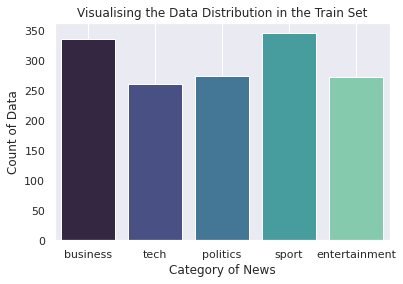

In [17]:
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.countplot(x ='Category', data = train_df,palette='mako')
plt.title("Visualising the Data Distribution in the Train Set")
plt.xlabel ('Category of News')
plt.ylabel ('Count of Data')
plt.grid()
plt.show()

NOTE - The train dataset is not perfectly balanced, but is not highly imbalanced.

In [18]:
y = train_df['Category']
print(y)

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object


In [19]:
X = train_df.copy()
X.drop('Category',axis = 1, inplace = True)

In [20]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [21]:
# Print the first sample text example ( before pre-processing)
print(X['Text'][0])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebbe

In [22]:
print(X)

      ArticleId                                               Text
0          1833  worldcom ex-boss launches defence lawyers defe...
1           154  german business confidence slides german busin...
2          1101  bbc poll indicates economic gloom citizens in ...
3          1976  lifestyle  governs mobile choice  faster  bett...
4           917  enron bosses in $168m payout eighteen former e...
...         ...                                                ...
1485        857  double eviction from big brother model caprice...
1486        325  dj double act revamp chart show dj duo jk and ...
1487       1590  weak dollar hits reuters revenues at media gro...
1488       1587  apple ipod family expands market apple has exp...
1489        538  santy worm makes unwelcome visit thousands of ...

[1490 rows x 2 columns]


In [23]:
# The punctuations exist in string.punctuations are used to eliminate the punctuations.
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
# Check for all the stopwords and the stopwords are eliminated from the text during pre-processing.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
# Remove punctuations, stop-words and convert all text to lower-case
def my_preprocess_text(input_text,stem_on,lemma_on):
  #------------------------------Remove Punctuations----------------------#
  # Removing punctuations in string
  my_str = str(input_text)
  set_punct = string.punctuation
  # Using loop + punctuation string
  for word in my_str:
    if word in set_punct:
      my_str = my_str.replace(word, "")


  #-------------------------Convert to Lower Case--------------------------#
  my_str = my_str.lower()
  
  #-----------------------------Remove Stopwords---------------------------#
  from nltk.corpus import stopwords
  from nltk.tokenize import word_tokenize
  set_stopwords = set(stopwords.words('english'))
  # Pass the processed string here
  my_tokens = nltk.word_tokenize(my_str)
  my_ans = []
  for w in my_tokens:
    if w not in set_stopwords:
      my_ans.append(w)
  #print(my_ans)

  # Get back the string to use an input for Lemmatizer
  my_str = ""
  # Traverse in the string
  for word in my_ans:
        my_str += word
        my_str += " "


  #----------------------------Stemming------------------------------#
  from nltk.stem import PorterStemmer
  if(stem_on == 'Yes'):
    my_res = []
    my_tokens = nltk.word_tokenize(my_str)
    # importing modules
    ps = PorterStemmer()
    for w in my_tokens:
      my_stem = ps.stem(w)
      my_res.append(my_stem)
      #print("Lemma for {} is {}".format(w,lemma))
      #print(my_res)
      # Get back the string to return the processed string.
    my_str = ""
    # Traverse in the string
    for word in my_res:
      my_str += word
      my_str += " "

  #-----------------------Lemmatization-------------------------------------#
  from nltk.stem import WordNetLemmatizer
  if(lemma_on == 'Yes'):
    my_lemmatizer = WordNetLemmatizer()
    # Reduce the words to their root form
    my_tokens = nltk.word_tokenize(my_str)
    my_res = []
    for w in my_tokens:
      lemma = my_lemmatizer.lemmatize(w)
      my_res.append(lemma)
      #print("Lemma for {} is {}".format(w,lemma))
      #print(my_res)
      # Get back the string to return the processed string.
    my_str = ""
    # Traverse in the string
    for word in my_res:
      my_str += word
      my_str += " "
  

  return my_str

In [46]:
# Example to check appropriate pre-processing
my_preprocess_text('I am studies !@','Yes','Yes')

'studi '

In [29]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [30]:
# Implementing the preprocessing on the etnire Training Dataframe
#train_df['Text'] = train_df['Text'].apply(preprocess_text)
# Get the Text in the new dataframe. Used for processing further.
#X['Text'] = train_df['Text']

#4. The Dataset:

● Split the BBC train dataset into training and testing sets.

● Use a 70:30 split for the training and testing sets, respectively.

In [31]:
# As the Train - Test split is in the specified ratio as 70:30 and hence the test_size is set to 30% only
def get_split(X,y,split_ratio):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42, stratify=y)
  print("The no. of samples in Training Set is as : ",X_train.shape[0])
  print("The no. of samples in the Test Set is as ",X_test.shape[0])
  return X_train,X_test, y_train, y_test

In [31]:
#X_train,X_test, y_train, y_test = get_split(X,y,0.30)

In [32]:
#Example after processing.
#X_train['Text'][0]

### NOTE : -  Implementing the TF-ICF Weighting Scheme
Term Frequency (TF): Number of occurrences of a term in all documents of a particular class.

Class Frequency (CF): Number of classes in which that term occurs.

Inverse-Class Frequency (ICF): log( N / CF), where N represents the number of classes (log 10).


In [33]:
#X_train['Text'][0].split()

In [34]:
#y_train[0]

FUNCTION DEFINITION - get_tf(X,y)  :

Get the Training Data i.e. the text samples in X_train and corresponding labels or category for each row of text in y_train and evaluates the count of each term i.e. the term frequency for each of the term, corresponding to  a gievn category and hence the function returns a dictionary of dictionaries where the outer key consists of the labels or the categories and the inner values correspond to another nested dictionary consisting of the the term as the key and the corresponding frequency as the value and hence form a key-value pair for the nested dictionary. 

NOTE - If a word exists in a document 'n' no of times, then all of its occurences are evaluated as the term frequency of the term for the label in a specific document. Next if the term appears in another document corresponding to the same label, the frequency is increemented accordingly. The function also evalautes the count of documents in which a term occurs and hence returns the second structure as a dictionary which consists of the a unique term as the key and the no. of documents in which the term appears at least once.

In [32]:
# Input - (data) - It is a dataframe which has all the columns as X  - 'Text' and the y labels are as 'Category'.
def get_tf(X,y):
  length = X.shape[0]
  #print(len)
  tf_dict = {}
  cat_list = {}
  # Iterate over all the data samples ( Text Samples)
  for i in X.index:
    # Iterate over each word in the given Training Set
    for word in X['Text'][i].split():
      # Get the category for the current piece of text being explored.
      label = y[i]
      if label in tf_dict:
        if word in tf_dict[label]:
          tf_dict[label][word] = tf_dict[label][word] + 1
        else:
          tf_dict.setdefault(label, {})[word] = 1 
      else:
        tf_dict.setdefault(label, {})[word] = 1 
    # Find the documents which consist of a specific word.
    # NOTE - This does not stores the repeated occurence of the word
    for word in set(X['Text'][i].split()):
      if word in cat_list:
        cat_list[word] = cat_list[word] + 1
      else:
        cat_list.update({word:1})
  return tf_dict,cat_list

FUNCTION DEFINITION  - get_icf:

The function to evaluate the Inverse Category Frequnecy. The input to the function is the dictionary of dictionaries for the term frequency. We first iterate over the keys in the nested dictionary corresponding to the label/category values in the outer dictionary and next, if the given term exists as a key correspoding to one or more labels we increement the category count and evaluate the ICF for the given word using the log of ratio of all categories over the count of categories in which the term exists.

In [33]:
# Calculate ICF ( Inverse - Class Frequency )
# Class Frequnecy  - No. of classes in which the term occurs.
def get_icf(my_tf_dict, vocabulary, all_class):
  icf = {}
  cat_count = 0
  for word in vocabulary.keys():
    # Count the no. of categories to which a word belongs.
    cat_count = 0
    # Find the answer as for which categories the word exists.
    for out_key, in_key_dict in my_tf_dict.items():
      if word in in_key_dict:
          cat_count = cat_count + 1
    #print('Word',word,'Count',cat_count)
    # Add one for the case of smoothing veikctor 
    icf[word] = math.log(all_class/cat_count,10)

  return icf

FUNCTION DEFINITION - get_idf:



In [34]:
def get_idf(my_vocab,all_doc_train):
  idf_dict = {}
  for word in my_vocab.keys():
    idf_dict[word] = math.log(all_doc_train/my_vocab[word],10)
  return idf_dict

FUNCTION DEFINITION - get_tf_icf

In [35]:
def get_tf_icf(my_tf_dict,icf_dict):
  tf_icf_dict = {}
  # Get the label of the category
  for label in my_tf_dict:
    # Get the words corresponding to the given label
    for word in my_tf_dict[label].keys():
      tf_val = my_tf_dict[label][word]
      icf_val = icf_dict[word]
      if label in tf_icf_dict:
        if word in tf_icf_dict[label]:
          tf_icf_dict[label][word] = tf_val * icf_val
        else:
           tf_icf_dict.setdefault(label, {})[word] = tf_val * icf_val
      else:
        tf_icf_dict.setdefault(label, {})[word] = tf_val * icf_val
  return tf_icf_dict

FUNCTION DEFINITION - get_tf_idf

In [36]:
def get_tf_idf(my_tf_dict,idf_dict):
  tf_idf_dict = {}
  # Get the label of the category
  for label in my_tf_dict:
    # Get the words corresponding to the given label
    for word in my_tf_dict[label].keys():
      tf_val = my_tf_dict[label][word]
      idf_val = idf_dict[word]
      if label in tf_idf_dict:
        if word in tf_idf_dict[label]:
          tf_idf_dict[label][word] = tf_val * idf_val
        else:
           tf_idf_dict.setdefault(label, {})[word] = tf_val * idf_val
      else:
        tf_idf_dict.setdefault(label, {})[word] = tf_val * idf_val
  return tf_idf_dict

### Test Code ( Print Statements to print and verify intermediate 

In [40]:
#print(X)

In [41]:
#print(X_train)

In [42]:
#print(X_train['Text'][466])

In [43]:
#tf_dict,my_vocab = get_tf(X_train,y_train)

In [44]:
#print(my_vocab)

In [45]:
#print(tf_dict.keys())

In [46]:
#print(tf_dict['business'].keys())

In [47]:
#sort_vocab = dict(sorted(my_vocab.items(), key=lambda item: item[1]))
#print(len(sort_vocab))

In [48]:
#for out_key, in_key_dict in tf_dict.items():
   #print(f"Outer key: {out_key}")
   #print(in_key_dict)

In [49]:
#all_doc_train = len(X_train)

In [50]:
#icf_dict = get_icf(tf_dict, my_vocab, all_class)

In [51]:
#idf_dict = get_idf(my_vocab,all_doc_train)

In [52]:
#print(idf_dict)

In [53]:
#print(icf_dict)

In [55]:
#tf_icf_dict = get_tf_icf(tf_dict,icf_dict)

In [56]:
#tf_idf_dict = get_tf_idf(tf_dict,idf_dict)

In [57]:
#print(tf_idf_dict)

In [58]:
#print(tf_icf_dict)

Implementing the TF-ICF Weighing.

In [59]:
#print(X_test)

#5. Training the Naive Bayes classifier with TF-ICF:

● Implement the Naive Bayes classifier with the TF-ICF weighting scheme.

● Calculate the probability of each category based on the frequency of documents in the training set that belong to that category.

● Calculate the probability of each feature given each category based on the TF-ICF values of that feature in documents belonging to that category.

In [37]:
class NaiveBayesClassifier:
  def __init__(self):
    self.category_count = {}
    self.all_articles = 0
    self.tf_dict = {}
    self.icf_dict = {}
    self.tf_icf_dict = {}
    self.tf_idf_dict = {}

#---------------------------------------------------------------------------------------------------------------------TRAIN-----------------------------------------------------------------------------------#

  def train(self,X,y,tf_dict,icf_dict,tf_icf_dict,tf_idf_dict):
    # How many documents of each category exists. -> Find the total no. of documents in each category.
    for i in X.index:
      label = y[i]
      if label in self.category_count:
        self.category_count[label] = self.category_count[label] + 1
      else:
           self.category_count.setdefault(label,1)
    # Assign the evaluated values on the Train Data to the class variables.
    self.all_articles  = X.shape[0]
    self.tf_dict = tf_dict
    self.tf_icf_dict = tf_icf_dict
    self.tf_idf_dict = tf_idf_dict
    # print(self.category_count)
    # Remember - The function 'predict' takes in input as the processed text in a row.

#---------------------------------------------------------------------------------------------------------------------PREDICT TF_ICF----------------------------------------------------------------------------------#

  def predict(self,test_txt):
    log_prob_dict = {}
    cat_prob_dict = {}
    #print(self.category_count.keys())
    #print(self.all_articles)
    for label in self.category_count.keys():
      #print(label)
      # category_count[label] -  Total no. of training examples for the label
      #------------------------------------------------------------------------------------------------------------------------------------------#
      if label in cat_prob_dict:
        # The probability of label i.e. what is the class probability from amongst all given articles, what is the probability of occurence of a specific class.
        #print('In if loop')
        cat_prob_dict[label] = (self.category_count[label]/self.all_articles)
      else:
        #print('Out of if loop', self.category_count[label]/self.all_articles )
        cat_prob_dict.update({label:self.category_count[label]/self.all_articles})


      # Now predict on the basis of input word.
      # What is the term frequency of the given word for given specific category
      # We iterate over all the categories, to find out the maximum probability of the word to exist in one of the specified category.
      for label in cat_prob_dict.keys():
        #print("EVALUATING FOR LABEL ---------", label)
        for word in test_txt.split():
          #tf = self.tf_dict[label][word]
          #icf = self.icf_dict.get(word,0)
          #log_prob_dict[label] += self.tf_icf_dict[label][word] / (sum(self.tf_dict[label].values()) + len(self.icf_dict))
          if label in log_prob_dict:
            if word in self.tf_icf_dict[label]:
              log_prob_dict[label] += self.tf_icf_dict[label][word]
            else:
              log_prob_dict[label] += 0
          else:
            log_prob_dict.update({label:0})

#------------Multiplying term queries with category priors--------------------------------#
      for label in cat_prob_dict.keys():
        log_prob_dict[label] = log_prob_dict[label]*cat_prob_dict[label]

        #print('HI')f

    res_class = None
    # Initialize the maximum value to negative infinity
    max_log_prob = float('-inf')
    # Iterate over the category and the corresponding label values to get the maximum value of probability and then return the corresponding class.

    for label, log_prob in log_prob_dict.items():
      #print(log_prob)
      if log_prob > max_log_prob:
        max_class = label
        max_log_prob = log_prob
    return max_class




#-------------------------------------------------------------------------------------------PREDICT TF-ICF-----------------------------------------------------------------------------------------------------------------#
  def predict_tf_idf(self,test_txt):
      log_prob_dict = {}
      cat_prob_dict = {}
      #print(self.category_count.keys())
      #print(self.all_articles)
      for label in self.category_count.keys():
        #print(label)
        # category_count[label] -  Total no. of training examples for the label
        #------------------------------------------------------------------------------------------------------------------------------------------#
        if label in cat_prob_dict:
          # The probability of label i.e. what is the class probability from amongst all given articles, what is the probability of occurence of a specific class.
          print('In if loop')
          cat_prob_dict[label] = (self.category_count[label]/self.all_articles)
        else:
          #print('Out of if loop', self.category_count[label]/self.all_articles )
          cat_prob_dict.update({label:self.category_count[label]/self.all_articles})


        # Now predict on the basis of input word.
        # What is the term frequency of the given word for given specific category
        # We iterate over all the categories, to find out the maximum probability of the word to exist in one of the specified category.
        for label in cat_prob_dict.keys():
          #print("EVALUATING FOR LABEL ---------", label)
          for word in test_txt.split():
            #tf = self.tf_dict[label][word]
            #icf = self.icf_dict.get(word,0)
            #log_prob_dict[label] += self.tf_icf_dict[label][word] / (sum(self.tf_dict[label].values()) + len(self.icf_dict))
            if label in log_prob_dict:
              if word in self.tf_idf_dict[label]:
                log_prob_dict[label] += self.tf_idf_dict[label][word]
              else:
                log_prob_dict[label] += 0
            else:
              log_prob_dict.update({label:0})

  #----------------------------------------------------------------------Multiplying term queries with category priors-------------------------------------------------------------------------------#
        for label in cat_prob_dict.keys():
          log_prob_dict[label] = log_prob_dict[label]*cat_prob_dict[label]

          #print('HI')f

      res_class = None
      # Initialize the maximum value to negative infinity
      max_log_prob = float('-inf')
      # Iterate over the category and the corresponding label values to get the maximum value of probability and then return the corresponding class.

      for label, log_prob in log_prob_dict.items():
        #print(log_prob)
        if log_prob > max_log_prob:
          max_class = label
          max_log_prob = log_prob
      return max_class

In [38]:
def get_metric_eval(res_category,y_test):
  eval_dict = {'Accuracy': 0, 'Precision': 0, 'Recall': 0 , 'F1-Score':0}
  lst = []

  # ------Accuracy---------#
  total_samples = y_test.shape[0]
  count = 0
  j = 0
  for i in y_test.index:
    if(y_test[i]==res_category[j]):
      #print('HI')
      count = count+1
    j = j + 1
  lst.append((count/total_samples)*100)

  #--------Precision---------#
  lst.append(precision_score(y_test, res_category,average="macro"))

  #--------Recall------------#

  lst.append(recall_score(y_test, res_category,average="macro"))

  #--------F-1-Score--------#

  lst.append(f1_score(y_test, res_category,average="macro"))
  
  itr = 0
  for key in eval_dict.keys():
    if key in eval_dict.keys():
     eval_dict.update({key:lst[itr]})
    itr = itr+1
  return eval_dict

In [56]:
# Initialise the Classifier to get the final predictions
def run_main(mode,split,stem_on,lemma_on):
      # Initialise the Classifier to get the final predictions
      my_NB_cf = NaiveBayesClassifier()
      # Implementing the preprocessing on the etnire Training Dataframe
      for i in range(train_df.shape[0]):
         X['Text'][i] = my_preprocess_text(train_df['Text'][i], stem_on,lemma_on)
        # Get the Text in the new dataframe. Used for processing further.
      X_train,X_test, y_train, y_test = get_split(X,y,split)
      tf_dict,my_vocab = get_tf(X_train,y_train)
      all_doc_train = len(X_train)
      icf_dict = get_icf(tf_dict, my_vocab, all_class)
      idf_dict = get_idf(my_vocab,all_doc_train)
      tf_icf_dict = get_tf_icf(tf_dict,icf_dict)
      tf_idf_dict = get_tf_idf(tf_dict,idf_dict)
      my_NB_cf.train(X_train,y_train,tf_dict,icf_dict,tf_icf_dict,tf_idf_dict)
      res_category = []
      for i in X_test.index:
        test_document = X_test['Text'][i]
        if(mode == 'TF-ICF'):
          predicted_category = my_NB_cf.predict(test_document)
        elif(mode == 'TF-IDF'):
          predicted_category = my_NB_cf.predict_tf_idf(test_document)
        else:
          print('INVALID MODE')
        res_category.append(predicted_category)
      # After prediction,evaluate the performance on different metrics
      #print(res_category)
      metric = get_metric_eval(res_category,y_test)
      return metric

#6. Testing the Naive Bayes classifier with TF-ICF:

● Use the testing set to evaluate the performance of the classifier.

● Classify each document in the testing set and compare the predicted category with the actual category.

● Calculate the accuracy, precision, recall, and F1 score of the classifier.

In [55]:
pd.options.mode.chained_assignment = None

In [57]:
run_main('TF-ICF',0.20,'No','Yes')

The no. of samples in Training Set is as :  1192
The no. of samples in the Test Set is as  298


{'Accuracy': 96.30872483221476,
 'Precision': 0.9646332814825966,
 'Recall': 0.9623953658282016,
 'F1-Score': 0.9627989033516539}

#7. Improving the classifier:

● Experiment with different preprocessing techniques and parameters to improve the performance of the classifier( including different splits like 60-40,80-20, 50-50).

● Try using different types of features such as n-grams or TF-IDF weights.

● Evaluate the performance of the classifier after each experiment and compare it with the previous results.

#7.1 Evaluating Train-Test Splits for TF-ICF Weighting Scheme

In [58]:
run_main('TF-ICF',0.30,'No','Yes')

The no. of samples in Training Set is as :  1043
The no. of samples in the Test Set is as  447


{'Accuracy': 95.74944071588367,
 'Precision': 0.9562714617587795,
 'Recall': 0.9559947739614486,
 'F1-Score': 0.9556439435912824}

In [59]:
run_main('TF-ICF',0.40,'No','Yes')

The no. of samples in Training Set is as :  894
The no. of samples in the Test Set is as  596


{'Accuracy': 95.46979865771812,
 'Precision': 0.9550386275434983,
 'Recall': 0.9546563019040082,
 'F1-Score': 0.954008947555949}

In [60]:
run_main('TF-ICF',0.50,'No','Yes')

The no. of samples in Training Set is as :  745
The no. of samples in the Test Set is as  745


{'Accuracy': 94.8993288590604,
 'Precision': 0.9480129743102547,
 'Recall': 0.947162776396353,
 'F1-Score': 0.9472899291692112}

#7.2  Evaluating Train-Test Split for TF-ICF Weighting Scheme

In [61]:
run_main('TF-IDF',0.20,'No','Yes')

The no. of samples in Training Set is as :  1192
The no. of samples in the Test Set is as  298


{'Accuracy': 89.26174496644296,
 'Precision': 0.9129645979543755,
 'Recall': 0.8835350157089288,
 'F1-Score': 0.8890271804644924}

In [62]:
run_main('TF-IDF',0.30,'No','Yes')

The no. of samples in Training Set is as :  1043
The no. of samples in the Test Set is as  447


{'Accuracy': 91.2751677852349,
 'Precision': 0.9278884811999948,
 'Recall': 0.9039195289134916,
 'F1-Score': 0.9096859665156701}

In [63]:
run_main('TF-IDF',0.40,'No','Yes')

The no. of samples in Training Set is as :  894
The no. of samples in the Test Set is as  596


{'Accuracy': 88.9261744966443,
 'Precision': 0.9070694980694981,
 'Recall': 0.8786807144605309,
 'F1-Score': 0.8801908393557332}

In [64]:
run_main('TF-IDF',0.50,'No','Yes')

The no. of samples in Training Set is as :  745
The no. of samples in the Test Set is as  745


{'Accuracy': 90.06711409395973,
 'Precision': 0.92055353226113,
 'Recall': 0.8907244953266218,
 'F1-Score': 0.8979780062834362}

#7.3 Evaluating with both Stemming and Lemmatization 


In [65]:
run_main('TF-ICF',0.20,'Yes','Yes')

The no. of samples in Training Set is as :  1192
The no. of samples in the Test Set is as  298


{'Accuracy': 94.96644295302013,
 'Precision': 0.9519709272530781,
 'Recall': 0.9478499112827471,
 'F1-Score': 0.9483557857819935}

In [66]:
run_main('TF-ICF',0.30,'Yes','Yes')

The no. of samples in Training Set is as :  1043
The no. of samples in the Test Set is as  447


{'Accuracy': 94.85458612975391,
 'Precision': 0.9480498874190826,
 'Recall': 0.9468225809447736,
 'F1-Score': 0.9470399493393687}

In [67]:
run_main('TF-ICF',0.40,'Yes','Yes')

The no. of samples in Training Set is as :  894
The no. of samples in the Test Set is as  596


{'Accuracy': 95.46979865771812,
 'Precision': 0.9546372083591017,
 'Recall': 0.954727835874625,
 'F1-Score': 0.9537990504388059}

In [68]:
run_main('TF-ICF',0.50,'Yes','Yes')

The no. of samples in Training Set is as :  745
The no. of samples in the Test Set is as  745


{'Accuracy': 95.30201342281879,
 'Precision': 0.9527718768293612,
 'Recall': 0.951968931311997,
 'F1-Score': 0.952003013126053}

#8. Conclusion:

● Write a brief report summarizing your findings.

● Discuss the performance of the classifier and the impact of different preprocessing techniques, features, and weighting schemes on the results.

RESULT 


1.   The better scheme amongst TF-IDF and TF-ICF is TF-IDF on the basis of evaluated metric as accuracy.
2.   Amongsts all the train - test splits evaluated, a best train-test split is 80:20 as it gives the highest accuracy on the test set. 

